# 1.0. Prerequisites

In [ ]:
#CDQA_adv CODE
!pip install bs4 tika nltk rank_bm25 transformers==3.0 pysummarization

     |████████████████████████████████| 757kB 11.8MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 901kB 28.3MB/s 
     |████████████████████████████████| 3.0MB 38.8MB/s 
     |████████████████████████████████| 1.2MB 48.5MB/s 
  Created wheel for tika: filename=tika-1.24-cp37-none-any.whl size=32885 sha256=c3b7843fa706d6c42dfbfad2a9f72fa567d96bc3e487a19d39d6d7da283f2827
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
  Created wheel for pysummarization: filename=pysummarization-1.1.7-cp37-none-any.whl size=45592 sha256=5539b21d5bc8534c44d66408d88fb026bd4f3178984f9e486a5da968b6a20751
  Stored in directory: /root/.cache/pip/wheels/14/ed/b1/dcc6807b7d9fed235233528e38ab276b245612b01246e96b3d
Successfully built tika pysummarization


# 2.0. Previous Models

---

* BERT
* ALBERT
* ELECTRA
* Hugging-Face
* Allen-NLP


## 2.1. ALBERT Model

In [ ]:
import torch
from transformers import AlbertTokenizer, AlbertForQuestionAnswering
tokenizer = AlbertTokenizer.from_pretrained('ahotrod/albert_xxlargev1_squad2_512')
model = AlbertForQuestionAnswering.from_pretrained('ahotrod/albert_xxlargev1_squad2_512')


def answer(question, text):
    input_dict = tokenizer.encode_plus(question, text, return_tensors='pt')
    input_ids = input_dict["input_ids"].tolist()
    start_scores, end_scores = model(**input_dict)

    start = torch.argmax(start_scores)
    end = torch.argmax(end_scores)

    all_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    answer = ''.join(all_tokens[start: end + 1]).replace('▁', ' ').strip()
    answer = answer.replace('[SEP]', '')
    return answer if answer != '[CLS]' and len(answer) != 0 else 'could not find an answer'

import time
start = time.time()
context="ELECTRA is one of the latest classes of pre-trained Transformer models released by Google and it switches things up a bit compared to most other releases. For the most part, Transformer models have followed the well-trodden path of Deep Learning, with larger models, more training, and bigger datasets equalling better performance. ELECTRA, however, bucks this trend by outperforming earlier models like BERT while using less computational power, smaller datasets, and less training time. (In case you are wondering, ELECTRA is the same “size” as BERT)."
question="What is electra?"
print(answer(question,context), time.time()-start)

## 2.2 ELECTRA Model

In [ ]:
import time

from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/electra-base-squad2"

# a) Get predictions

start = time.time()
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)
print(res['answer'])

print(time.time()-start)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

transformers gives freedom to the user and let people easily switch between frameworks.
7.363531827926636


## 2.3 ROBERTA Model

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
import time
model_name = "deepset/roberta-base-squad2"

start = time.time()

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)

print(res['answer'])

print(time.time()-start)

# b) Load model & tokenizer
# model = AutoModelForQuestionAnswering.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at deepset/roberta-base-squad2 were not used when initializing RobertaForQuestionAnswering: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


gives freedom to the user and let people easily switch between frameworks.
9.710147380828857


## 2.4. BERT Model

In [ ]:
question = "How many parameters does BERT-large have?"
answer_text = "BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance."


def answer_question(question, answer_text):
    '''
    Takes a `question` string and an `answer_text` string (which contains the
    answer), and identifies the words within the `answer_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.
    input_ids = tokenizer.encode(question, answer_text)

    # Report how long the input sequence is.
    print('Query has {:,} tokens.\n'.format(len(input_ids)))

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    # ======== Evaluate ========
    # Run our example through the model.
    outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                    token_type_ids=torch.tensor([segment_ids]), # The segment IDs to differentiate question from answer_text
                    return_dict=True) 

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):
        
        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]
        
        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')

answer_question(question, answer_text)

## 2.5. Allen-NLP Model

In [ ]:
# !pip install allennlp-models==1.0.0rc3
context="ELECTRA is one of the latest classes of pre-trained Transformer models released by Google and it switches things up a bit compared to most other releases. For the most part, Transformer models have followed the well-trodden path of Deep Learning, with larger models, more training, and bigger datasets equalling better performance. ELECTRA, however, bucks this trend by outperforming earlier models like BERT while using less computational power, smaller datasets, and less training time. (In case you are wondering, ELECTRA is the same “size” as BERT)."
question="What is electra?"

import time
start = time.time()
from allennlp.predictors.predictor import Predictor
import allennlp_models.rc
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/bidaf-elmo-model-2020.03.19.tar.gz")
answer = predictor.predict(
  context="ELECTRA is one of the latest classes of pre-trained Transformer models released by Google and it switches things up a bit compared to most other releases. For the most part, Transformer models have followed the well-trodden path of Deep Learning, with larger models, more training, and bigger datasets equalling better performance. ELECTRA, however, bucks this trend by outperforming earlier models like BERT while using less computational power, smaller datasets, and less training time. (In case you are wondering, ELECTRA is the same “size” as BERT).",
  question="What is electra?"
)

print(answer['best_span_str'],time.time()-start)

# 3.0. CDQA_adv Model (Proposed Model)

## 3.1. Architecture


### 3.1.1. Question Answering (Q.A.)
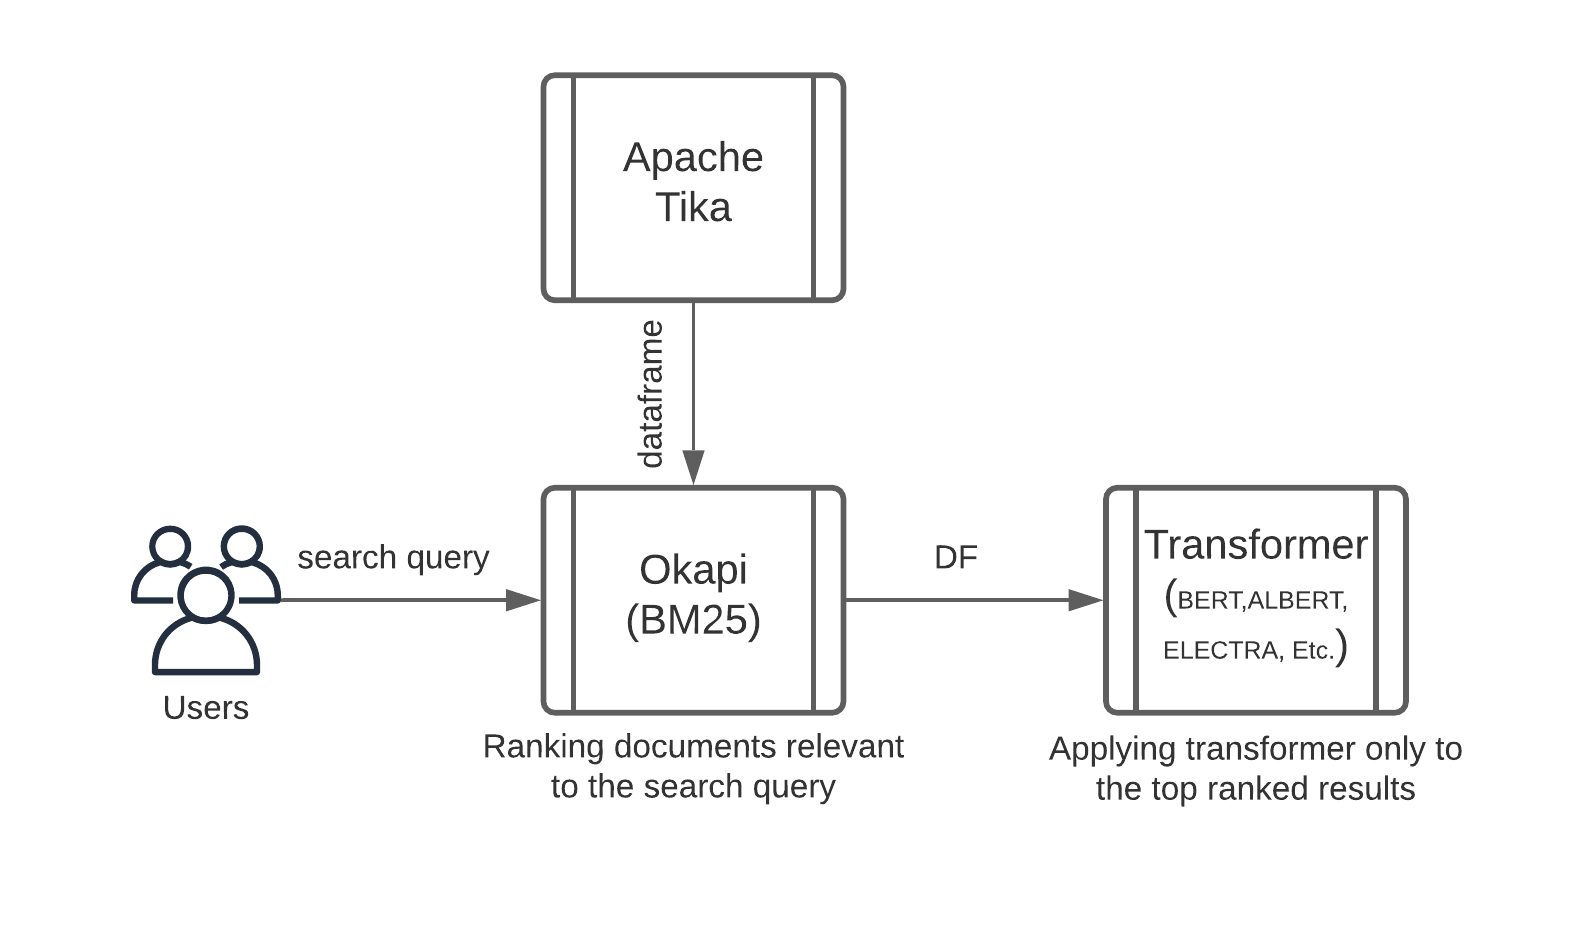

### 3.1.2. Question Generation (Q.G.)
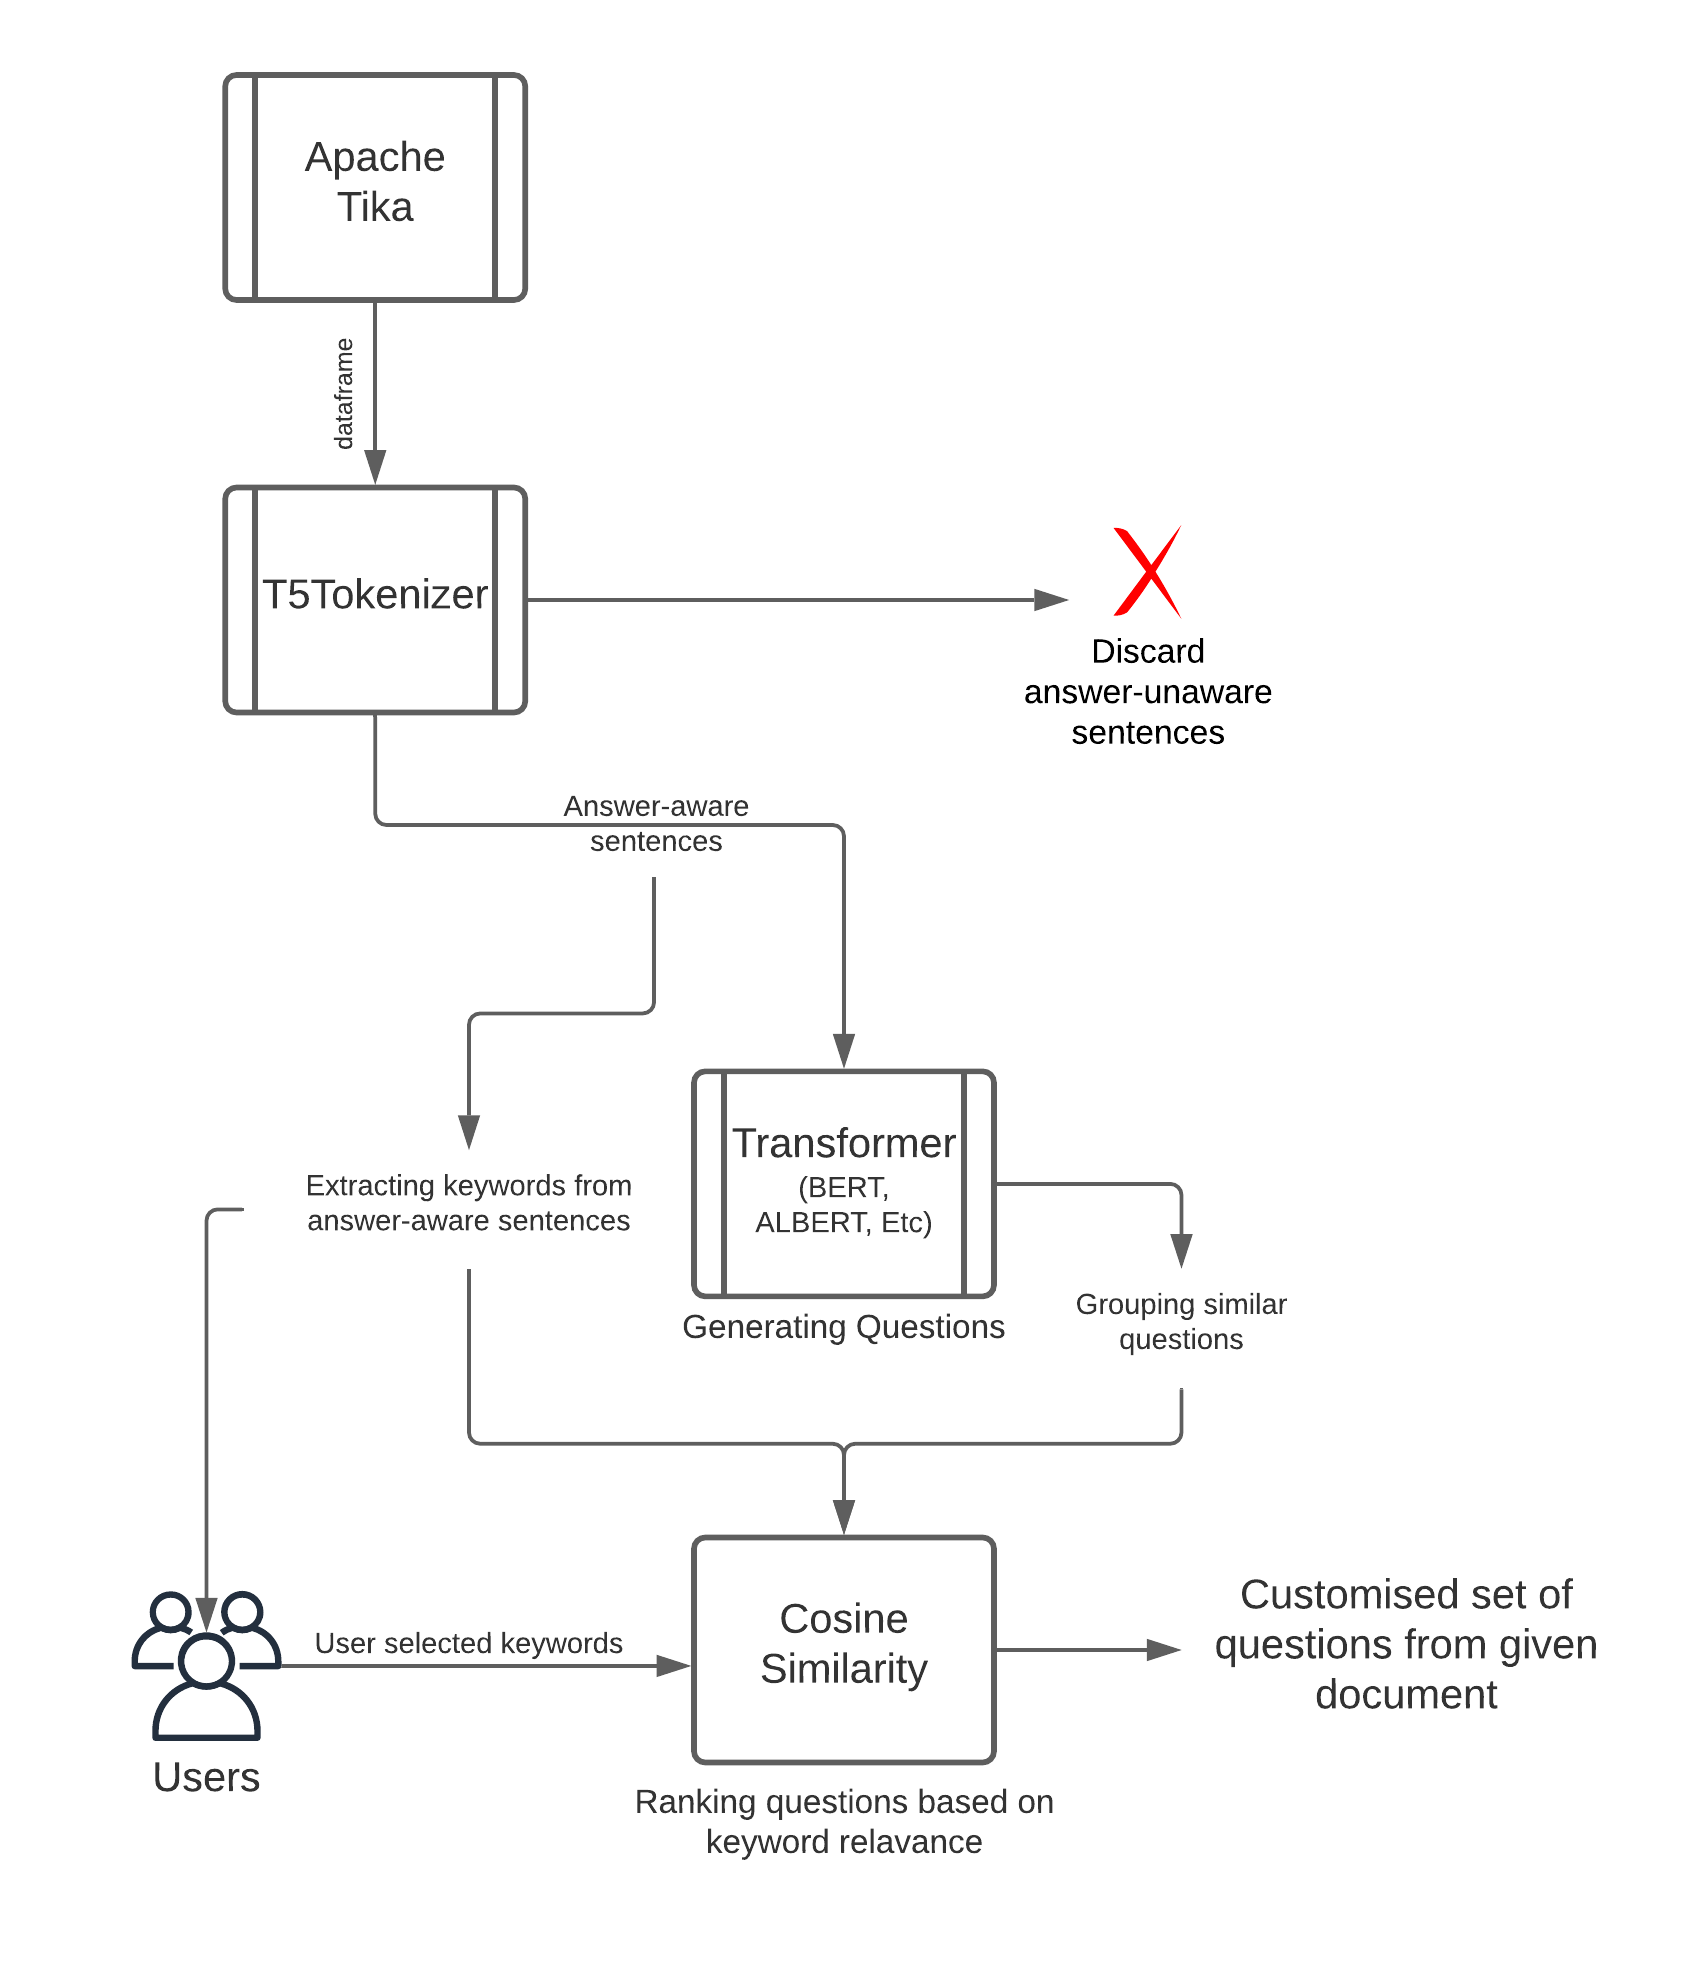

## 3.2. Code

> Hugging-Face Model

In [ ]:
import itertools
import logging
from typing import Optional, Dict, Union

from nltk import sent_tokenize

import torch
from transformers import(
    AutoModelForSeq2SeqLM, 
    AutoTokenizer,
    PreTrainedModel,
    PreTrainedTokenizer,
)

logger = logging.getLogger(__name__)

class QGPipeline:
    """Poor man's QG pipeline"""
    def __init__(
        self,
        model: PreTrainedModel,
        tokenizer: PreTrainedTokenizer,
        ans_model: PreTrainedModel,
        ans_tokenizer: PreTrainedTokenizer,
        qg_format: str,
        use_cuda: bool
    ):
        self.model = model
        self.tokenizer = tokenizer

        self.ans_model = ans_model
        self.ans_tokenizer = ans_tokenizer

        self.qg_format = qg_format

        self.device = "cuda" if torch.cuda.is_available() and use_cuda else "cpu"
        self.model.to(self.device)

        if self.ans_model is not self.model:
            self.ans_model.to(self.device)

        assert self.model.__class__.__name__ in ["T5ForConditionalGeneration", "BartForConditionalGeneration"]
        
        if "T5ForConditionalGeneration" in self.model.__class__.__name__:
            self.model_type = "t5"
        else:
            self.model_type = "bart"

    def __call__(self, inputs: str):
        inputs = " ".join(inputs.split())
        sents, answers = self._extract_answers(inputs)
        flat_answers = list(itertools.chain(*answers))
        
        if len(flat_answers) == 0:
          return []

        if self.qg_format == "prepend":
            qg_examples = self._prepare_inputs_for_qg_from_answers_prepend(inputs, answers)
        else:
            qg_examples = self._prepare_inputs_for_qg_from_answers_hl(sents, answers)
        
        qg_inputs = [example['source_text'] for example in qg_examples]
        questions = self._generate_questions(qg_inputs)
        output = [{'answer': example['answer'], 'question': que} for example, que in zip(qg_examples, questions)]
        return output
    
    def _generate_questions(self, inputs):
        inputs = self._tokenize(inputs, padding=True, truncation=True)
        
        outs = self.model.generate(
            input_ids=inputs['input_ids'].to(self.device), 
            attention_mask=inputs['attention_mask'].to(self.device), 
            max_length=32,
            num_beams=4,
        )
        
        questions = [self.tokenizer.decode(ids, skip_special_tokens=True) for ids in outs]
        return questions
    
    def _extract_answers(self, context):
        sents, inputs = self._prepare_inputs_for_ans_extraction(context)
        inputs = self._tokenize(inputs, padding=True, truncation=True)

        outs = self.ans_model.generate(
            input_ids=inputs['input_ids'].to(self.device), 
            attention_mask=inputs['attention_mask'].to(self.device), 
            max_length=32,
        )
        
        dec = [self.ans_tokenizer.decode(ids, skip_special_tokens=False) for ids in outs]
        answers = [item.split('<sep>') for item in dec]
        answers = [i[:-1] for i in answers]
        
        return sents, answers
    
    def _tokenize(self,
        inputs,
        padding=True,
        truncation=True,
        add_special_tokens=True,
        max_length=512
    ):
        inputs = self.tokenizer.batch_encode_plus(
            inputs, 
            max_length=max_length,
            add_special_tokens=add_special_tokens,
            truncation=truncation,
            padding="max_length" if padding else False,
            pad_to_max_length=padding,
            return_tensors="pt"
        )
        return inputs
    
    def _prepare_inputs_for_ans_extraction(self, text):
        sents = sent_tokenize(text)

        inputs = []
        for i in range(len(sents)):
            source_text = "extract answers:"
            for j, sent in enumerate(sents):
                if i == j:
                    sent = "<hl> %s <hl>" % sent
                source_text = "%s %s" % (source_text, sent)
                source_text = source_text.strip()
            
            if self.model_type == "t5":
                source_text = source_text + " </s>"
            inputs.append(source_text)

        return sents, inputs
    
    def _prepare_inputs_for_qg_from_answers_hl(self, sents, answers):
        inputs = []
        for i, answer in enumerate(answers):
            if len(answer) == 0: continue
            for answer_text in answer:
                sent = sents[i]
                sents_copy = sents[:]
                
                answer_text = answer_text.strip()
                
                ans_start_idx = sent.index(answer_text)
                
                sent = f"{sent[:ans_start_idx]} <hl> {answer_text} <hl> {sent[ans_start_idx + len(answer_text): ]}"
                sents_copy[i] = sent
                
                source_text = " ".join(sents_copy)
                source_text = f"generate question: {source_text}" 
                if self.model_type == "t5":
                    source_text = source_text + " </s>"
                
                inputs.append({"answer": answer_text, "source_text": source_text})
        
        return inputs
    
    def _prepare_inputs_for_qg_from_answers_prepend(self, context, answers):
        flat_answers = list(itertools.chain(*answers))
        examples = []
        for answer in flat_answers:
            source_text = f"answer: {answer} context: {context}"
            if self.model_type == "t5":
                source_text = source_text + " </s>"
            
            examples.append({"answer": answer, "source_text": source_text})
        return examples

    
class MultiTaskQAQGPipeline(QGPipeline):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    def __call__(self, inputs: Union[Dict, str]):
        if type(inputs) is str:
            # do qg
            return super().__call__(inputs)
        else:
            # do qa
            return self._extract_answer(inputs["question"], inputs["context"])
    
    def _prepare_inputs_for_qa(self, question, context):
        source_text = f"question: {question}  context: {context}"
        if self.model_type == "t5":
            source_text = source_text + " </s>"
        return  source_text
    
    def _extract_answer(self, question, context):
        source_text = self._prepare_inputs_for_qa(question, context)
        inputs = self._tokenize([source_text], padding=False)
    
        outs = self.model.generate(
            input_ids=inputs['input_ids'].to(self.device), 
            attention_mask=inputs['attention_mask'].to(self.device), 
            max_length=16,
        )

        answer = self.tokenizer.decode(outs[0], skip_special_tokens=True)
        return answer


class E2EQGPipeline:
    def __init__(
        self,
        model: PreTrainedModel,
        tokenizer: PreTrainedTokenizer,
        use_cuda: bool
    ) :

        self.model = model
        self.tokenizer = tokenizer

        self.device = "cuda" if torch.cuda.is_available() and use_cuda else "cpu"
        self.model.to(self.device)

        assert self.model.__class__.__name__ in ["T5ForConditionalGeneration", "BartForConditionalGeneration"]
        
        if "T5ForConditionalGeneration" in self.model.__class__.__name__:
            self.model_type = "t5"
        else:
            self.model_type = "bart"
        
        self.default_generate_kwargs = {
            "max_length": 256,
            "num_beams": 4,
            "length_penalty": 1.5,
            "no_repeat_ngram_size": 3,
            "early_stopping": True,
        }
    
    def __call__(self, context: str, **generate_kwargs):
        inputs = self._prepare_inputs_for_e2e_qg(context)

        # TODO: when overrding default_generate_kwargs all other arguments need to be passsed
        # find a better way to do this
        if not generate_kwargs:
            generate_kwargs = self.default_generate_kwargs
        
        input_length = inputs["input_ids"].shape[-1]
        
        # max_length = generate_kwargs.get("max_length", 256)
        # if input_length < max_length:
        #     logger.warning(
        #         "Your max_length is set to {}, but you input_length is only {}. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)".format(
        #             max_length, input_length
        #         )
        #     )

        outs = self.model.generate(
            input_ids=inputs['input_ids'].to(self.device), 
            attention_mask=inputs['attention_mask'].to(self.device),
            **generate_kwargs
        )

        prediction = self.tokenizer.decode(outs[0], skip_special_tokens=True)
        questions = prediction.split("<sep>")
        questions = [question.strip() for question in questions[:-1]]
        return questions
    
    def _prepare_inputs_for_e2e_qg(self, context):
        source_text = f"generate questions: {context}"
        if self.model_type == "t5":
            source_text = source_text + " </s>"
        
        inputs = self._tokenize([source_text], padding=False)
        return inputs
    
    def _tokenize(
        self,
        inputs,
        padding=True,
        truncation=True,
        add_special_tokens=True,
        max_length=512
    ):
        inputs = self.tokenizer.batch_encode_plus(
            inputs, 
            max_length=max_length,
            add_special_tokens=add_special_tokens,
            truncation=truncation,
            padding="max_length" if padding else False,
            pad_to_max_length=padding,
            return_tensors="pt"
        )
        return inputs


SUPPORTED_TASKS = {
    "question-generation": {
        "impl": QGPipeline,
        "default": {
            "model": "valhalla/t5-small-qg-hl",
            "ans_model": "valhalla/t5-small-qa-qg-hl",
        }
    },
    "multitask-qa-qg": {
        "impl": MultiTaskQAQGPipeline,
        "default": {
            "model": "valhalla/t5-small-qa-qg-hl",
        }
    },
    "e2e-qg": {
        "impl": E2EQGPipeline,
        "default": {
            "model": "valhalla/t5-small-e2e-qg",
        }
    }
}

def pipeline(
    task: str,
    model: Optional = None,
    tokenizer: Optional[Union[str, PreTrainedTokenizer]] = None,
    qg_format: Optional[str] = "highlight",
    ans_model: Optional = None,
    ans_tokenizer: Optional[Union[str, PreTrainedTokenizer]] = None,
    use_cuda: Optional[bool] = True,
    **kwargs,
):
    # Retrieve the task
    if task not in SUPPORTED_TASKS:
        raise KeyError("Unknown task {}, available tasks are {}".format(task, list(SUPPORTED_TASKS.keys())))

    targeted_task = SUPPORTED_TASKS[task]
    task_class = targeted_task["impl"]

    # Use default model/config/tokenizer for the task if no model is provided
    if model is None:
        model = targeted_task["default"]["model"]
    
    # Try to infer tokenizer from model or config name (if provided as str)
    if tokenizer is None:
        if isinstance(model, str):
            tokenizer = model
        else:
            # Impossible to guest what is the right tokenizer here
            raise Exception(
                "Impossible to guess which tokenizer to use. "
                "Please provided a PretrainedTokenizer class or a path/identifier to a pretrained tokenizer."
            )
    
    # Instantiate tokenizer if needed
    if isinstance(tokenizer, (str, tuple)):
        if isinstance(tokenizer, tuple):
            # For tuple we have (tokenizer name, {kwargs})
            tokenizer = AutoTokenizer.from_pretrained(tokenizer[0], **tokenizer[1])
        else:
            tokenizer = AutoTokenizer.from_pretrained(tokenizer)
    
    # Instantiate model if needed
    if isinstance(model, str):
        model = AutoModelForSeq2SeqLM.from_pretrained(model)
    
    if task == "question-generation":
        if ans_model is None:
            # load default ans model
            ans_model = targeted_task["default"]["ans_model"]
            ans_tokenizer = AutoTokenizer.from_pretrained(ans_model)
            ans_model = AutoModelForSeq2SeqLM.from_pretrained(ans_model)
        else:
            # Try to infer tokenizer from model or config name (if provided as str)
            if ans_tokenizer is None:
                if isinstance(ans_model, str):
                    ans_tokenizer = ans_model
                else:
                    # Impossible to guest what is the right tokenizer here
                    raise Exception(
                        "Impossible to guess which tokenizer to use. "
                        "Please provided a PretrainedTokenizer class or a path/identifier to a pretrained tokenizer."
                    )
            
            # Instantiate tokenizer if needed
            if isinstance(ans_tokenizer, (str, tuple)):
                if isinstance(ans_tokenizer, tuple):
                    # For tuple we have (tokenizer name, {kwargs})
                    ans_tokenizer = AutoTokenizer.from_pretrained(ans_tokenizer[0], **ans_tokenizer[1])
                else:
                    ans_tokenizer = AutoTokenizer.from_pretrained(ans_tokenizer)

            if isinstance(ans_model, str):
                ans_model = AutoModelForSeq2SeqLM.from_pretrained(ans_model)
    
    if task == "e2e-qg":
        return task_class(model=model, tokenizer=tokenizer, use_cuda=use_cuda)
    elif task == "question-generation":
        return task_class(model=model, tokenizer=tokenizer, ans_model=ans_model, ans_tokenizer=ans_tokenizer, qg_format=qg_format, use_cuda=use_cuda)
    else:
        return task_class(model=model, tokenizer=tokenizer, ans_model=model, ans_tokenizer=tokenizer, qg_format=qg_format, use_cuda=use_cuda)


In [ ]:
nlp = pipeline("multitask-qa-qg")

# context="ELECTRA is one of the latest classes of pre-trained Transformer models released by Google and it switches things up a bit compared to most other releases. For the most part, Transformer models have followed the well-trodden path of Deep Learning, with larger models, more training, and bigger datasets equalling better performance. ELECTRA, however, bucks this trend by outperforming earlier models like BERT while using less computational power, smaller datasets, and less training time. (In case you are wondering, ELECTRA is the same “size” as BERT)."
# question="What is electra?"
context = "Question answering (QA) is a challenging task and has received considerable attention in the last years since it has assumed a central role in the next generation of both digital assistants, like Siri, Google Assistant, Alexa, and Cortana, as well as of cognitive systems like Watson [1]. QA systems have been actively studied to automatically answer with either short facts or long passages to natural language questions issued by users in different languages, in contrast to search engines, able to return a collection of related documents given some keywords. Even though there are many variations in the proposed QA systems [2-4], typical QA systems adopt a pipeline architecture that incorporates three major phases: (1) question processing; (2) information retrieval; (3) answer selection" 
question = 'what are the phases of QA Architecture?'


import time
start=time.time()
ans = nlp({
  "question": question,
  "context": context
}) 
print(time.time()-start, ans)

0.10874533653259277 (1) question processing; (2) information retrieval; (3) answer selection


In [ ]:
import requests
# from googlesearch import search
import bs4
import numpy as np
import re
import os
from tika import parser
import pandas as pd

#download nltk-stopwords
import nltk
nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

#search engine
from rank_bm25 import BM25Okapi
from rank_bm25 import BM25Plus
from rank_bm25 import BM25L

#transformer models
import torch
from transformers import(
    AutoModelForSeq2SeqLM, 
    AutoTokenizer,
    PreTrainedModel,
    PreTrainedTokenizer,
)




'''====================================================
            rank_bm25 model(search engine)
======================================================= '''

stop_words = list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


class rank_bm25:

    def __init__(self, query, documents,para_threshold=2):
        self.query = query
        self.documents = documents
        self.para_threshold = para_threshold


    def word_token(self, tokens, lemma=False):
        tokens = str(tokens)
        tokens = re.sub(
            r"([\w].)([\~\!\@\#\$\%\^\&\*\(\)\-\+\[\]\{\}\/\"\'\:\;])([\s\w].)", "\\1 \\2 \\3", tokens)
        tokens = re.sub(r"\s+", " ", tokens)
        if lemma:
            return " ".join([lemmatizer.lemmatize(token, 'v') for token in word_tokenize(tokens.lower()) if token not in stop_words and token.isalpha()])
        else:
            return " ".join([token for token in word_tokenize(tokens.lower()) if token not in stop_words and token.isalpha()])


    def get_similarity(self):
        docs = self.query + self.documents
        docs = [self.word_token(d, lemma=True) for d in docs]
        tokenized_corpus = [doc.split(' ') for doc in docs]
        bm25 = BM25Okapi(tokenized_corpus[1:])
        bm25plus = BM25Plus(tokenized_corpus[1:])
        bm25L = BM25L(tokenized_corpus[1:])

        self.query = tokenized_corpus[0]
        bm25_scores = bm25.get_scores(self.query)
        bm25plus_scores = bm25plus.get_scores(self.query)
        bm25L_scores = bm25L.get_scores(self.query)

        bm25_scores = [(i, v) for i, v in enumerate(bm25_scores)]
        bm25plus_scores = [(i, v) for i, v in enumerate(bm25plus_scores)]
        bm25L_scores = [(i, v) for i, v in enumerate(bm25L_scores)]

        bm25_scores.sort(key=lambda x: x[1], reverse=True)
        bm25plus_scores.sort(key=lambda x: x[1], reverse=True)
        bm25L_scores.sort(key=lambda x: x[1], reverse=True)

        return bm25_scores, bm25plus_scores, bm25L_scores


    def select_context(self):

        bm_1, _, _ = self.get_similarity()
        bm_1 = np.array(bm_1)
        bm_1_idx = bm_1[bm_1[:, 1] > 1][:self.para_threshold, 0]
        bm_1_idx = np.array(bm_1_idx, dtype=int)
        if bm_1_idx.size == 0:
          bm_1_idx=np.array([0])

        return ' '.join(self.documents[i] for i in sorted(bm_1_idx)), ','.join( str(i+1) for i in bm_1_idx)







'''====================================================
            Convert Multiple pdfs to dataframe
======================================================= '''


class dataframe_converter:
    
    def __init__(self, para_min_length= 200, include_line_breaks=False):
        self.para_min_length = para_min_length
        self.include_line_breaks = include_line_breaks

    def paragraph_df_converter(self, context):
        paragraphs = re.split("\n\n(?=\u2028|[A-Z-0-9])", context)
        paragraph_list = []
        temp_para = ""
        for p in paragraphs:
            if not p.isspace():
                if self.include_line_breaks:
                    if len(p) >= self.para_min_length:
                        if temp_para:
                            paragraph_list.append(temp_para.strip())
                            temp_para = ( "" )
                            paragraph_list.append( p.replace("\n", "") )
                        else:
                            paragraph_list.append(p.replace("\n", ""))
                    else:
                        line = p.replace("\n", " ").strip()
                        temp_para = temp_para + f" {line}"
                else:
                    paragraph_list.append(p.replace("\n", ""))
            else:
                if temp_para:
                    paragraph_list.append(temp_para.strip())

        return paragraph_list


    def pdf_df_converter(self,directory_path):
        list_file = os.listdir(directory_path)
        list_pdf = []
        for file in list_file:
            if file.endswith("pdf"):
                list_pdf.append(file)
        df = pd.DataFrame(columns=["title", "paragraphs"])
        for i, pdf in enumerate(list_pdf):
            try:
                df.loc[i] = [pdf.replace(".pdf", ''), None]
                raw = parser.from_file(os.path.join(directory_path, pdf))
                raw_context = raw["content"].strip()

                df.loc[i, "paragraphs"] = self.paragraph_df_converter(raw_context)
            except:
                print("Unable to process file {}".format(pdf))
        return df








'''====================================================
              Question Answering Models
======================================================= '''


class Question_Answering_Pipline:


    def __init__(self, context=None, question=None, para_min_length=200, para_threshold=2, include_line_breaks=True):
        self.context = context
        self.question = question
        self.para_min_length = para_min_length
        self.para_threshold = para_threshold
        self.include_line_breaks = include_line_breaks
        self.cdqa = {'Question': question }  









'''====================================================
            Convert Multiple pdfs to dataframe
======================================================= '''


class CDQA_adv:


    def __init__(self, context=None, question=None, model=1 ,para_min_length=200, para_threshold=2, include_line_breaks=True):
        self.context = context
        self.question = question
        self.model = model
        self.para_min_length = para_min_length
        self.para_threshold = para_threshold
        self.include_line_breaks = include_line_breaks
        self.cdqa = {'Question': question }
        self.nlp = pipeline("multitask-qa-qg")



    def generate_answer(self, context=None, question=None):
        selected_context = None
        if context != None:
          self.context = context
        if self.context == None:
          return {"Error_encountered":"Please Give a Context to the Question"}
        
        if question != None:
          self.question = question
          self.cdqa['Question'] = question
        if self.question == None:
          return {"Error_encountered":"Please Give a Question to Answer"}

        #preprocess the context
        df_converter = dataframe_converter(self.para_min_length, self.include_line_breaks)
        paragraph_list = df_converter.paragraph_df_converter(self.context)

        #intilize rank_bm25 searching
        search_engine = rank_bm25([self.question], paragraph_list, self.para_threshold)
        selected_context, bm_1_idx = search_engine.select_context()

        # error handling
        if selected_context == '':
          self.cdqa['Answer'] = "Answer Not Found in the given context, Add more details or perform online search!!"
          return self.cdqa

        self.cdqa['Answer_Paragraph'] = selected_context
        self.cdqa['Paragraph_Numbers'] = bm_1_idx

        self.answer_pipeline()

        return self.cdqa




    def doc_generate_answer(self, directory_path=None , question=None):
        selected_context = None
        if directory_path == None:
          return {"Error_encountered":"Please Give a Directory Path to the PDFs"}
        
        if question != None:
          self.question = question
          self.cdqa['Question'] = question
        if self.question == None:
          return {"Error_encountered":"Please Give a Question to answer"}

        #preprocess the Pdf for context
        df_converter = dataframe_converter(
            self.para_min_length, self.include_line_breaks)
        para_dataframe = df_converter.pdf_df_converter(directory_path)

        #intilize rank_bm25 searching
        answer = {
            'doc_name':[],
            'para_id':[],
            'answer_para':[]
        }
        for ele in para_dataframe.index:
          search_engine = rank_bm25([self.question], para_dataframe['paragraphs'][ele], self.para_threshold)
          selected_context, bm_1_idx = search_engine.select_context()
          if selected_context != '':
            answer['doc_name'].append(para_dataframe['title'][ele])
            answer['para_id'].append(bm_1_idx)
            answer['answer_para'].append(selected_context)

        # error handling
        if len(answer['para_id']) == 0:
          self.cdqa['Answer'] = "Answer Not Found in the given context, Add more details or perform online search!!"
          return self.cdqa

        if len(answer['para_id']) != 1:
          search_engine = rank_bm25([self.question], answer['answer_para'], self.para_threshold)
          self.cdqa['Answer_Paragraph'], idx = search_engine.select_context()
          self.cdqa['Document_Name'] = answer['doc_name'][int(idx)]
          self.cdqa['Paragraph_Numbers'] = answer['para_id'][int(idx)]
        else:
          self.cdqa['Answer_Paragraph'] = answer['answer_para'][0]
          self.cdqa['Document_name'] = answer['doc_name'][0]
          self.cdqa['Paragraph_Numbers'] = answer['para_id'][0]

        self.context = self.cdqa['Answer_Paragraph']
        self.answer_pipeline()
        if self.cdqa['Answer'] == None:
           self.cdqa['Answer'] = "Answer Not Found in the given context, Add more details or perform online search!!"

        return self.cdqa

    
    def question_pipeline(self,context):
      self.cdqa['Question'] = self.nlp({context})
      return self.cdqa


    def answer_pipeline(self):
      if self.model == 1:
        self.cdqa['Answer'] = self.nlp({"question": self.question ,"context": self.context})
    # generate the answer here instead of calling it again

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## 3.3. Testing

In [ ]:
context = "Question answering (QA) is a challenging task and has received considerable attention in the last years since it has assumed a central role in the next generation of both digital assistants, like Siri, Google Assistant, Alexa, and Cortana, as well as of cognitive systems like Watson [1]. QA systems have been actively studied to automatically answer with either short facts or long passages to natural language questions issued by users in different languages, in contrast to search engines, able to return a collection of related documents given some keywords. Even though there are many variations in the proposed QA systems [2-4], typical QA systems adopt a pipeline architecture that incorporates three major phases: (1) question processing; (2) information retrieval; (3) answer selection" 
question = 'what are the phases of QA Architecture?'
# context="ELECTRA is one of the latest classes of pre-trained Transformer models released by Google and it switches things up a bit compared to most other releases. For the most part, Transformer models have followed the well-trodden path of Deep Learning, with larger models, more training, and bigger datasets equalling better performance. ELECTRA, however, bucks this trend by outperforming earlier models like BERT while using less computational power, smaller datasets, and less training time. (In case you are wondering, ELECTRA is the same “size” as BERT)."
# question="What is electra?"

import time 

start = time.time()
cdqa = CDQA_adv()
# answer = cdqa.doc_generate_answer('pdf_data', question = 'what is digital signal processing?')

answer = cdqa.generate_answer(context,question)

# df = dataframe_converter()
# len(df.pdf_df_converter("/content/pdf_data")['paragraphs'][0])

print(time.time()-start)
answer

4.145318984985352


{'Answer': '(1) question processing; (2) information retrieval; (3) answer selection',
 'Answer_Paragraph': 'Question answering (QA) is a challenging task and has received considerable attention in the last years since it has assumed a central role in the next generation of both digital assistants, like Siri, Google Assistant, Alexa, and Cortana, as well as of cognitive systems like Watson [1]. QA systems have been actively studied to automatically answer with either short facts or long passages to natural language questions issued by users in different languages, in contrast to search engines, able to return a collection of related documents given some keywords. Even though there are many variations in the proposed QA systems [2-4], typical QA systems adopt a pipeline architecture that incorporates three major phases: (1) question processing; (2) information retrieval; (3) answer selection',
 'Paragraph_Numbers': '1',
 'Question': 'what are the phases of QA Architecture?'}

In [ ]:
import nltk
nltk.download('punkt')

nlp = pipeline("multitask-qa-qg")

import time
start = time.time()
context = "Question answering (QA) is a challenging task and has received considerable attention in the last \
          years since it has assumed a central role in the next generation of both digital assistants, \
          like Siri, Google Assistant, Alexa, and Cortana, as well as of cognitive systems like Watson [1].\
          QA systems have been actively studied to automatically answer with either short facts or long passages \
          to natural language questions issued by users in different languages, in contrast to search engines,\
          able to return a collection of related documents given some keywords. Even though there are many \
          variations in the proposed QA systems [2-4], typical QA systems adopt a pipeline architecture that \
          incorporates three major's phases: (1) question processing; (2) information retrieval; (3) answer selection"
# print(nlp(context))
print(0.941*1.56, time.time()-start)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
1.46796 5.984306335449219e-05


# 4.0. SUMMARIZATION
  

In [ ]:
from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer
from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor


context = "Question answering (QA) is a challenging task and has received considerable attention in the last years since it has assumed a central role in the next generation of both digital assistants, like Siri, Google Assistant, Alexa, and Cortana, as well as of cognitive systems like Watson [1]. QA systems have been actively studied to automatically answer with either short facts or long passages to natural language questions issued by users in different languages, in contrast to search engines, able to return a collection of related documents given some keywords. Even though there are many variations in the proposed QA systems [2-4], typical QA systems adopt a pipeline architecture that incorporates three major phases: (1) question processing; (2) information retrieval; (3) answer selection" 
question = 'what are the phases of QA Architecture?'


# Object of automatic summarization.
auto_abstractor = AutoAbstractor()
# Set tokenizer.
auto_abstractor.tokenizable_doc = SimpleTokenizer()
# Set delimiter for making a list of sentence.
auto_abstractor.delimiter_list = [".", "\n"]
# Object of abstracting and filtering document.
abstractable_doc = TopNRankAbstractor()
# Summarize document.
result_dict = auto_abstractor.summarize(context, abstractable_doc)

# Output result.
# for sentence in result_dict["summarize_result"]:
#     print(sentence)


print("GIVEN CONTEXT      :     ")
print(context)
print("\n\n")

print("SUMMARIZED CONTENT     :     ")
print(result_dict["summarize_result"])

GIVEN CONTEXT      :     
Question answering (QA) is a challenging task and has received considerable attention in the last years since it has assumed a central role in the next generation of both digital assistants, like Siri, Google Assistant, Alexa, and Cortana, as well as of cognitive systems like Watson [1]. QA systems have been actively studied to automatically answer with either short facts or long passages to natural language questions issued by users in different languages, in contrast to search engines, able to return a collection of related documents given some keywords. Even though there are many variations in the proposed QA systems [2-4], typical QA systems adopt a pipeline architecture that incorporates three major phases: (1) question processing; (2) information retrieval; (3) answer selection



SUMMARIZED CONTENT     :     
['Question answering (QA) is a challenging task and has received considerable attention in the last years since it has assumed a central role in t